# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 2383 Анищенко Анастасия Ивановна и Бараева Елизавета Николаевна. Вариант №12.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Входной сигнал:

$s(t) = \sum_{m=1}^{M} c_m e^{iw_mt}$

Выходной сигнал:

$y(t) = \sum_{m=1}^{M} c_m H(w_m) e^{iw_mt}$

Необходимое условие для МНК:

$F(y_k) = \sum_{-k}^{k} (s_k - y_k)^2 → min$

Формула для вычисления передаточной функции рекурсивного фильтра $y_n$ дискретного сигнала $x_n$:

$H(w) = \frac{y_n}{x_n}$

Связь передаточной функции для круговой частоты и циклической:

$H(w) = H(2 \pi f) = \tilde H(f)$

Перевод значений передаточной функции в логарифмическую шкалу:

$Дб = 20 \lg \left(\left|\frac{y_n}{s_n}\right|\right) = 20 \lg (|H(w)|)$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

# Циклическая и круговая частоты
F = np.arange(0, 0.5, 0.0003)
W = [2 * m.pi * f for f in F]

## Задание 1

Выходной сигнал: $y(t) = A + Bt$

***Для 3 точек:***

Для нахождения коэфффициентов $A$ и $B$ воспользуемся МНК:

$F(A,B) = \sum_{k=-1}^{k=1} (s_k - y_k)^2 = \sum_{k=-1}^{k=1} (s_k - A - Bk)^2$

Берем частные производные по $A$ и $B$, получаем систему нормальных уравнений:

$ \begin{cases}
3A = \sum_{k=-1}^{k=1} s_k \\
2B = \sum_{k=-1}^{k=1} ks_k
\end{cases} $

В итоге получаем:

$y_0 = A = \frac{1}{3} \sum_{k=-1}^{k=1} s_k$

В общем случае:

$y_n = \frac{1}{3} \sum_{k=n-1}^{k=n+1} s_k = \frac{1}{3} (s_{n-1} + s_{n} + s_{n+1})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{3} (e^{iw(n-1)} + e^{iwn} + e^{iw(n+1)}) = \frac{1}{3} (e^{-iw} + 1 + e^{iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{3} (e^{-iw} + 1 + e^{iw}) = \frac{1}{3} (1 + 2cos(w))$

***Для 5 точек:***

$H(w) = \frac{1}{5} (e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw}) = \frac{1}{5} (1 + 2cos(w) + 2cos(2w))$

***Для 7 точек:***

$H(w) = \frac{1}{7} (e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw}) = \frac{1}{7} (1 + 2cos(w) + 2cos(2w) + 2cos(3w))$

***Для 9 точек:***

$H(w) = \frac{1}{9} (e^{-4iw} + e^{-3iw} + e^{-2iw} + e^{-iw} + 1 + e^{iw} + e^{2iw} + e^{3iw} + e^{4iw}) = \frac{1}{9} (1 + 2cos(w) + 2cos(2w) + 2cos(3w) + 2cos(4w))$

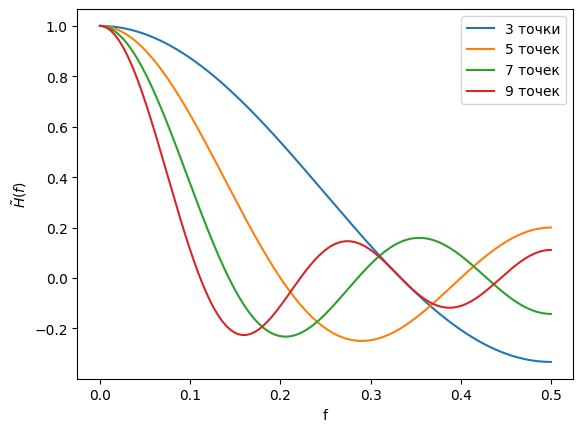

In [ ]:
# Значения функций
H3_poly1 = [1 / 3 * (1 + 2 * np.cos(w)) for w in W]
H5_poly1 = [1 / 5 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w)) for w in W]
H7_poly1 = [1 / 7 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w)) for w in W]
H9_poly1 = [1 / 9 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w) + 2 * np.cos(4 * w)) for w in W]

# График передаточной функции при сглаживании прямой линией по 3, 5, 7 и 9 точкам
plt.figure()
plt.plot(F, H3_poly1, label='3 точки')
plt.plot(F, H5_poly1, label='5 точек')
plt.plot(F, H7_poly1, label='7 точек')
plt.plot(F, H9_poly1, label='9 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

При увеличении числа точек передаточная функция имеет более резкий спад и сильнее подавляет высокие частоты, но при этом становится более восприимчивой к ним и может вызывать искажения в сигнале.

## Задание 2

Выходной сигнал: $y(t) = A + Bt + Ct^2$

***Для 7 точек:***

Для нахождения коэфффициентов $A$, $B$ и $C$ воспользуемся МНК:

$F(A,B,C) = \sum_{k=-3}^{k=3} (s_k - y_k)^2 = \sum_{k=-3}^{k=3} (s_k - A - Bk - Ck^2)^2$

Берем частные производные по $A$, $B$ и $C$, получаем систему нормальных уравнений:

$ \begin{cases}
7A + 28C = \sum_{k=-3}^{k=3} s_k \\
28B = \sum_{k=-3}^{k=3} ks_k \\
28A + 196C = \sum_{k=-3}^{k=3} k^2 s_k
\end{cases} $

Вычтем из 3-го уравнения 1-ое, домноженное на 7:

$-21A = 2s_{-3} - 3s_{-2} - 6s_{-1} - 7s_{0} - 6s_{1} - 3s_{2} + 2s_{3}$

В итоге получаем:

$y_0 = A = \frac{1}{21} (-2s_{-3} + 3s_{-2} + 6s_{-1} + 7s_{0} + 6s_{1} + 3s_{2} - 2s_{3})$

В общем случае:

$y_n = \frac{1}{21} (-2s_{n-3} + 3s_{n-2} + 6s_{n-1} + 7s_{n} + 6s_{n+1} + 3s_{n+2} - 2s_{n+3})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{21} (-2e^{-3iw} + 3e^{-2iw} + 6e^{-iw} + 7 + 6e^{iw}+ 3e^{2iw} - 2e^{3iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{21} (-2e^{-3iw} + 3e^{-2iw} + 6e^{-iw} + 7 + 6e^{iw}+ 3e^{2iw} - 2e^{3iw}) = \frac{1}{21} (7 + 12cos(w) + 6cos(2w) - 4cos(3w))$

***Для 9 точек:***

$H(w) = \frac{1}{231} (59 + 108cos(w) + 78cos(2w) + 28cos(3w) - 42cos(4w))$

***Для 11 точек:***

$H(w) = \frac{1}{429} (89 + 168cos(w) + 138cos(2w) + 88cos(3w) + 18cos(4w) - 72cos(5w))$

***Для 13 точек:***

$H(w) = \frac{1}{143} (25 + 48cos(w) + 42cos(2w) + 32cos(3w) + 18cos(4w) - 22cos(6w))$

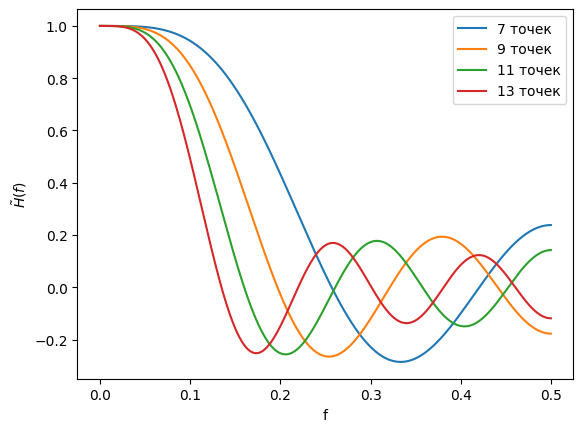

In [ ]:
# Значения функций
H7_poly2 = [1 / 21 * (7 + 12 * np.cos(w) + 6 * np.cos(2 * w) - 4 * np.cos(3 * w)) for w in W]
H9_poly2 = [1 / 231 * (59 + 108 * np.cos(w) + 78 * np.cos(2 * w) + 28 * np.cos(3 * w) - 42 * np.cos(4 * w)) for w in W]
H11_poly2 = [1 / 429 * (89 + 168 * np.cos(w) + 138 * np.cos(2 * w) + 88 * np.cos(3 * w) + 18 * np.cos(4 * w) - 72 * np.cos(5 * w)) for w in W]
H13_poly2 = [1 / 143 * (25 + 48 * np.cos(w) + 42 * np.cos(2 * w) + 32 * np.cos(3 * w) + 18 * np.cos(4 * w) - 22 * np.cos(6 * w)) for w in W]

# График передаточной функции при сглаживании полиномом второй степени по 7, 9, 11 и 13 точкам
plt.figure()
plt.plot(F, H7_poly2, label='7 точек')
plt.plot(F, H9_poly2, label='9 точек')
plt.plot(F, H11_poly2, label='11 точек')
plt.plot(F, H13_poly2, label='13 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

По сравнению со сглаживанием прямой линией спад стал более резким, а частота колебаний в высоких частотах и полоса пропускания увеличились. Также как и в предыдущем пункте, при увеличении числа точек передаточная функция сильнее подавляет высокие частоты, становится более восприимчивой к ним и может вызывать искажения в сигнале.

## Задание 3

Выходной сигнал: $y(t) = A + Bt + Ct^2 + Dt^3 + Et^4$

***Для 9 точек:***

Для нахождения коэфффициентов $A$, $B$, $C$, $D$ и $E$ воспользуемся МНК:

$F(A,B,C,D,E) = \sum_{k=-4}^{k=4} (s_k - y_k)^2 = \sum_{k=-4}^{k=4} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4)^2$

Берем частные производные по $A$, $B$, $C$, $D$ и $E$, получаем систему нормальных уравнений:

$ \begin{cases}
9A + 60C + 708E = \sum_{k=-4}^{k=4} s_k \\
60B + 708D = \sum_{k=-4}^{k=4} ks_k \\
60A + 708C + 9780E = \sum_{k=-4}^{k=4} k^2 s_k \\
708B + 9780D = \sum_{k=-4}^{k=4} k^3 s_k \\
708A + 9780C + 144708E = \sum_{k=-4}^{k=4} k^4 s_k
\end{cases} $

В итоге получаем:

$y_0 = A = \frac{1}{429} (15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_{0} + 135s_{1} + 30s_{2} - 55s_{3} + 15s_{4})$

В общем случае:

$y_n = \frac{1}{429} (15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_{n} + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$

Пусть $s_n = e^{iwn}$, тогда:

$y_n = \frac{1}{429} (15e^{-4iw} - 55e^{-3iw} + 30e^{-2iw} + 135e^{-iw} + 179 + 135e^{iw} + 30e^{2iw} - 55e^{3iw} + 15e^{4iw}) e^{iwn} = H(w)e^{iwn}$

Следовательно:

$H(w) = \frac{1}{429} (179 + 270cos(w) + 60cos(2w) - 110cos(3w) + 30cos(4w))$

***Для 11 точек:***

$H(w) = \frac{1}{429} (143 + 240cos(w) + 120cos(2w) - 20cos(3w) - 90cos(4w) + 36cos(5w))$

***Для 13 точек:***

$H(w) = \frac{1}{2431} (677 + 1200cos(w) + 780cos(2w) + 220cos(3w) - 270cos(4w) - 396cos(5w) + 220cos(6w))$

***Для 15 точек:***

$H(w) = \frac{1}{46189} (11063 + 20250cos(w) + 15000cos(2w) + 7510cos(3w) - 330cos(4w) - 5874cos(5w) - 5720cos(6w) + 4290cos(7w))$

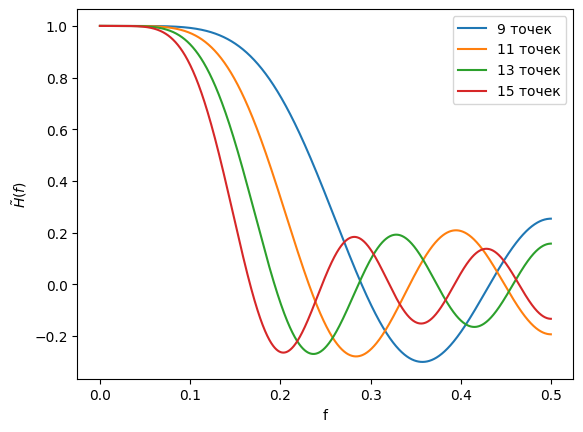

In [ ]:
# Значения функций
H9_poly4 = [1 / 429 * (179 + 270 * np.cos(w) + 60 * np.cos(2 * w) - 110 * np.cos(3 * w) + 30 * np.cos(4 * w)) for w in W]
H11_poly4 = [1 / 429 * (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) for w in W]
H13_poly4 = [1 / 2431 * (677 + 1200 * np.cos(w) + 780 * np.cos(2 * w) + 220 * np.cos(3 * w) - 270 * np.cos(4 * w) - 396 * np.cos(5 * w) + 220 * np.cos(6 * w)) for w in W]
H15_poly4 = [1 / 46189 * (11063 + 20250 * np.cos(w) + 15000 * np.cos(2 * w) + 7510 * np.cos(3 * w) - 330 * np.cos(4 * w) - 5874 * np.cos(5 * w) - 5720 * np.cos(6 * w) + 4290 * np.cos(7 * w)) for w in W]

# График передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам
plt.figure()
plt.plot(F, H9_poly4, label='9 точек')
plt.plot(F, H11_poly4, label='11 точек')
plt.plot(F, H13_poly4, label='13 точек')
plt.plot(F, H15_poly4, label='15 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

По сравнению со сглаживанием полиномом второй степени полоса пропускания увеличилась. Также как и в предыдущих пунктах, при увеличении числа точек передаточная функция имеет более резкий спад, сильнее подавляет высокие частоты, становится более восприимчивой к ним и может вызывать искажения в сигнале.

## Задание 4

Формула Спенсера для 15 точек:

$y_n = \frac{1}{320} (-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} + 67s_{n-1} + 74s_{n} + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Формула Спенсера для 21 точки:

$y_n = \frac{1}{350} (-s_{n-10} - 3s_{n-9} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_{n} + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} - 5s_{n+8} - 3s_{n+9} - s_{n+10})$

Следовательно:


***Для 15 точек:***

$H(w) = \frac{1}{320} (74 + 134cos(w) + 92cos(2w) + 42cos(3w) + 6cos(4w) - 10cos(5w) - 12cos(6w) - 6cos(7w))$

***Для 21 точки:***

$H(w) = \frac{1}{350} (60 + 114cos(w) + 94cos(2w) + 66cos(3w) + 36cos(4w) + 12cos(5w) - 4cos(6w) - 10cos(7w) - 10cos(8w) - 6cos(9w) - 2cos(10w))$



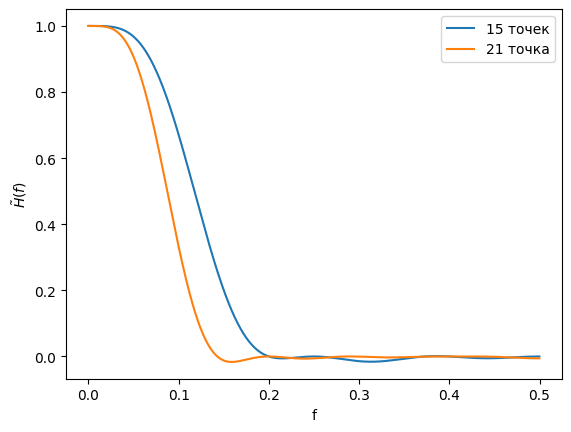

In [ ]:
# Значения функций
H15_Spencer = [1 / 320 * (74 + 134 * np.cos(w) + 92 * np.cos(2 * w) + 42 * np.cos(3 * w) + 6 * np.cos(4 * w) - 10 * np.cos(5 * w) - 12 * np.cos(6 * w) - 6 * np.cos(7 * w)) for w in W]
H21_Spencer = [1 / 350 * (60 + 114 * np.cos(w) + 94 * np.cos(2 * w) + 66 * np.cos(3 * w) + 36 * np.cos(4 * w) + 12 * np.cos(5 * w) - 4 * np.cos(6 * w) - 10 * np.cos(7 * w) - 10 * np.cos(8 * w) - 6 * np.cos(9 * w) - 2 * np.cos(10 * w)) for w in W]

# График передаточной функции при сглаживании по формулам Спенсера для 15 и 21 точек
plt.figure()
plt.plot(F, H15_Spencer, label='15 точек')
plt.plot(F, H21_Spencer, label='21 точка')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()
plt.show()

Также как и в предыдущих пунктах, при увеличении числа точек передаточная функция имеет более резкий спад, но при этом имеет небольшую полосу пропускания и практически полностью подавляет высокие частоты.

## Задание 5

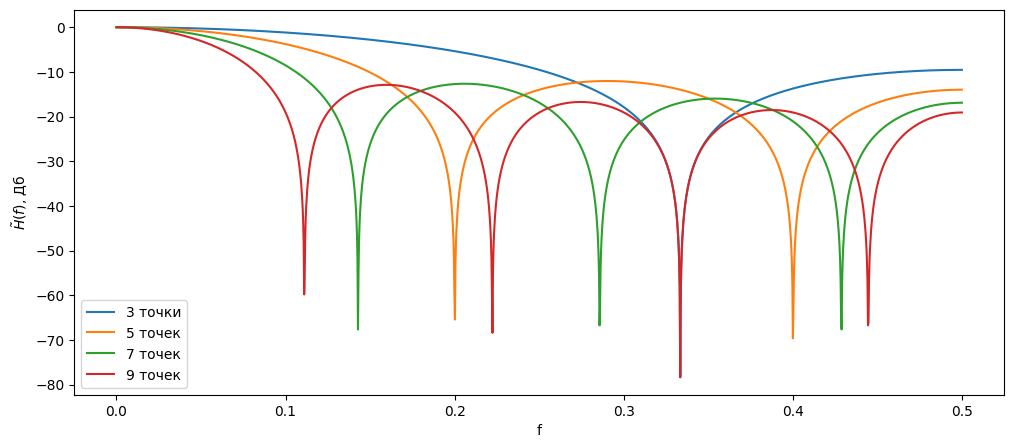

In [ ]:
# График передаточной функции при сглаживании прямой линией по 3, 5, 7 и 9 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H3_poly1], label='3 точки')
plt.plot(F, [20 * m.log10(abs(h)) for h in H5_poly1], label='5 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H7_poly1], label='7 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_poly1], label='9 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

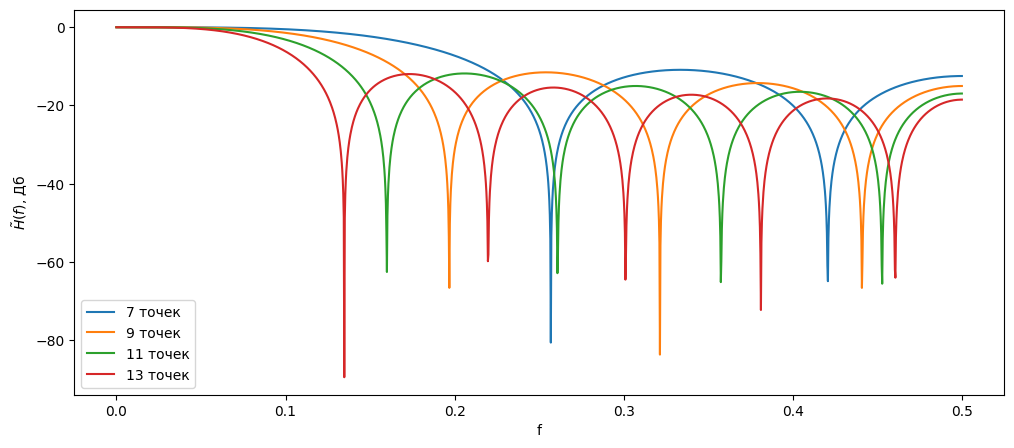

In [ ]:
# График передаточной функции при сглаживании полиномом второй степени по 7, 9, 11 и 13 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H7_poly2], label='7 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_poly2], label='9 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H11_poly2], label='11 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H13_poly2], label='13 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

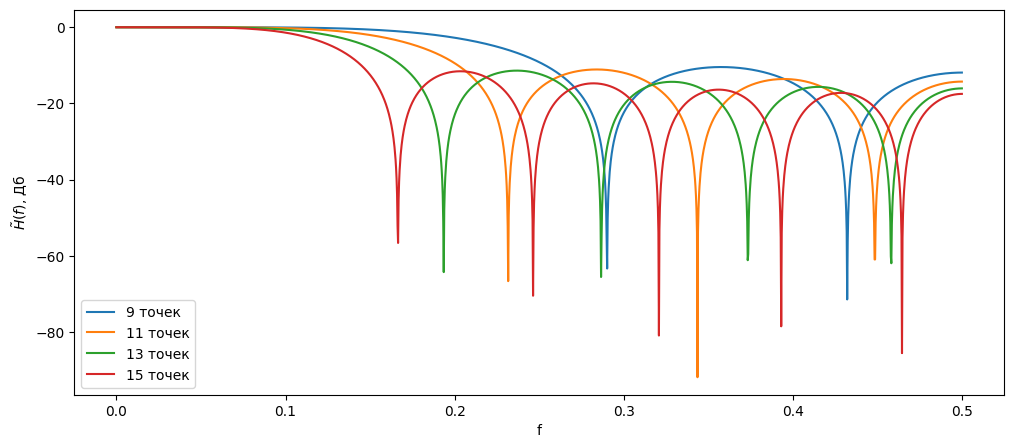

In [ ]:
# График передаточной функции при сглаживании полиномом четвертой степени по 9, 11, 13 и 15 точкам в логарифмической шкале
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H9_poly4], label='9 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H11_poly4], label='11 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H13_poly4], label='13 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H15_poly4], label='15 точек')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

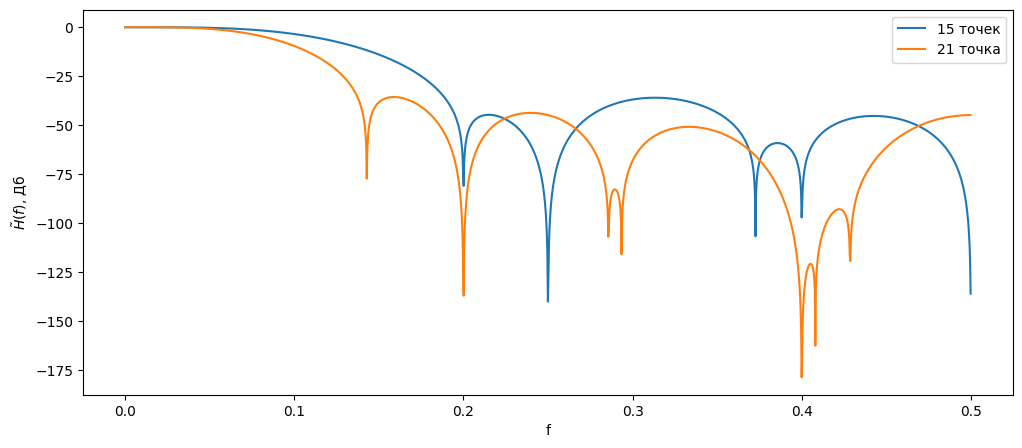

In [ ]:
# График передаточной функции при сглаживании по формулам Спенсера для 15 и 21 точек в логарифмической шкале
plt.figure(figsize=(12,5))
plt.plot(F, [20 * m.log10(abs(h)) for h in H15_Spencer], label='15 точек')
plt.plot(F, [20 * m.log10(abs(h)) for h in H21_Spencer], label='21 точка')
plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, Дб')
plt.legend()
plt.show()

В линейной шкале хорошо видно, как изменяется форма передаточной функции и где происходит спад, однако слабые участки (где амплитуда близка к нулю) почти неразличимы. В логарифмической шкале эти области становятся заметными, поэтому можно наглядно оценить, насколько эффективно фильтр подавляет высокие частоты  сигнала.

## Задание 6

По полученным графикам передаточных функций, соответствующим фильтрам сглаживания полиномами 1-й, 2-й, 4-й степени и сглаживанию по формуле Спенсера, можно сделать вывод, что у всех функций наблюдается резкий спад и сильное подавление высоких частот при увеличении количества точек приближения. Также с увеличением степени полинома мы отметили, что увеличивается пропускная полоса и частота колебаний на высоких частотах. В отличие от других полиномиальных сглаживаний, при сглаживании по формулам Спенсера колебания на высоких частотах практически отсутствуют.

## Выводы

В ходе выполнения лабораторной работы были выведены формулы для передаточных функций нерекурсивных фильтров, соответствующих сглаживанию полиномами 1-й, 2-й, 4-й степеней и сглаживанию по формулам Спенсера для разного количества точек приближения. По выведенным формулам были построены графики передаточных функций, а затем проинтерпретированы их частотные свойства для различного количества точек. Данные графики также были построены в логарифмической шкале, что позволило более точно рассмотреть колебания передаточных функций. В конце был проведен сопоставительный анализ частотных характеристик исследуемых нерекурсивных фильтров.